In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)

In [5]:
df['L/W'] = df['length']/df['width']

In [6]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [7]:
df[['length','width','depth','L/W']]=df[['length','width','depth','L/W']].replace(0,np.NaN)

In [8]:
df.dropna(inplace=True)

In [9]:
df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        0
dtype: int64

<AxesSubplot:xlabel='color', ylabel='price'>

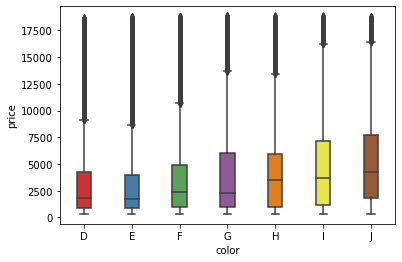

In [11]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )

From the above plot, we can see that G, H, I and J type color has less number of outliers compared to D and E

<AxesSubplot:xlabel='cut', ylabel='price'>

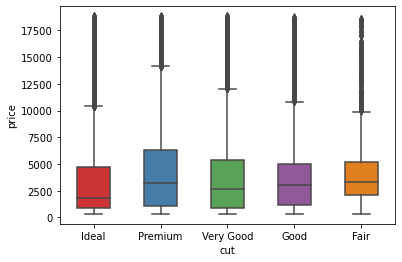

In [12]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type. Also, each category type has the same maximum and minimum price.

<AxesSubplot:xlabel='clarity', ylabel='price'>

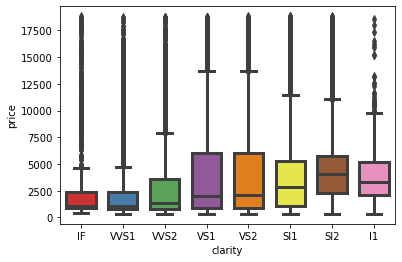

In [13]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

we can see that IF, VVS1 and VVS2 have a high number of outliers compared to other categories of color. Moreover VS1,VS2 are having less number of outliers compared to others.Also, each category type has the same maximum and minimum price.

<AxesSubplot:xlabel='clarity'>

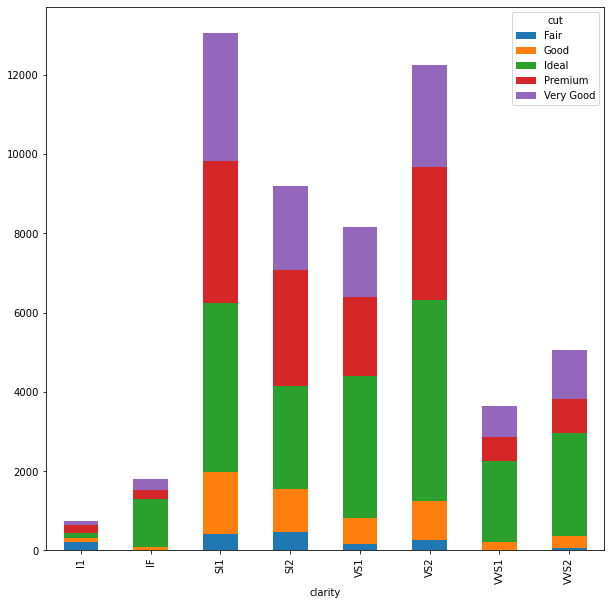

In [14]:
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others . and are ready to sacrifice on clarity but are more focusing on the cut of the diamonds.¶

<AxesSubplot:xlabel='cut'>

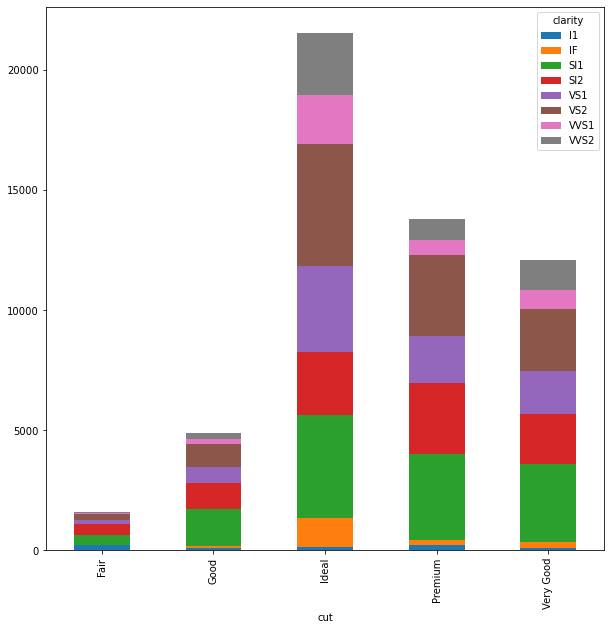

In [15]:
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.¶

<AxesSubplot:xlabel='color'>

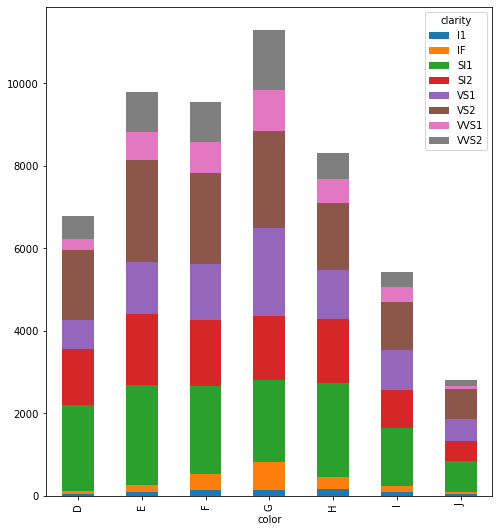

In [16]:
color_clarity_table = pd.crosstab(index=df["color"], columns=df["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(8,9),
                 stacked=True)

We can see that from above that most of the people prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 or SI2 category.Therefore from above all the plots, we can conclude that carat has high importance followed by cut, color, and clarity in predicting the price of a diamond.

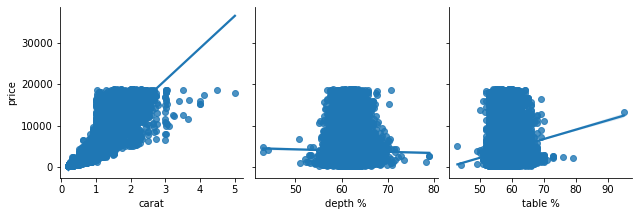

In [17]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth %','table %'] , y_vars =  ['price'] , kind = 'reg')

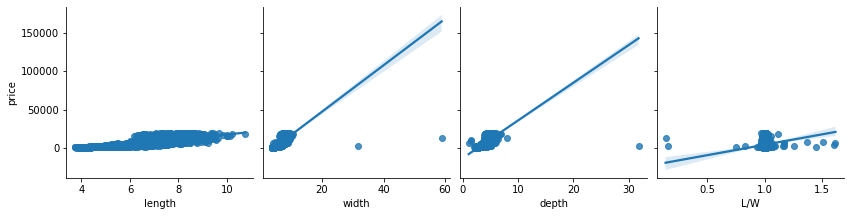

In [18]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth','L/W'] , y_vars =  ['price'] , kind = 'reg')

We could see that carat, length, width, and depth are showing linearity with price with fewer outliers and table %, depth %, and L/W are showing linearity but with high outliers.

<AxesSubplot:>

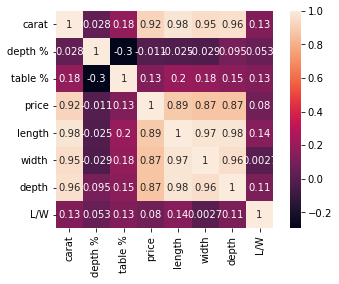

In [19]:
# Correlation Map
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

CONCLUSIONS :

Depth is inversely related to Price.
This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. 2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

The Weight (Carat) of a diamond has the most significant impact on its Price.
Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality. 4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

Self Relation ie. of a feature to itself is 1 as expected.

Some other Inferences can also be drawn.

# Visualization Of All Features

Carat: Carat refers to the Weight of the Stone, not the Size. The Weight of a Diamond has the most significant Impact on its Price. Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality. The carat of a Diamond is often very Important to People when shopping But it is a Mistake to Sacrifice too much quality for sheer size.

<AxesSubplot:xlabel='carat', ylabel='Density'>

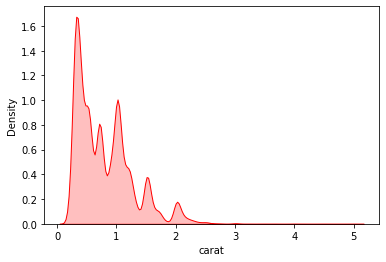

In [20]:
sns.kdeplot(df['carat'], shade=True , color='r')

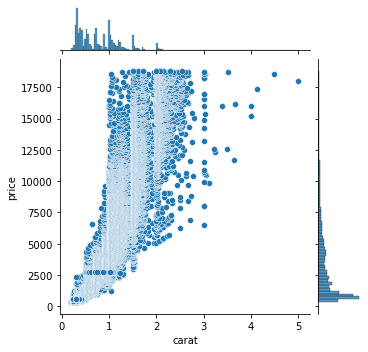

In [21]:
sns.jointplot(x='carat' , y='price' , data=df , size=5)

Carat varies with Price Exponentially.

Cut Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value. With a Higher Cut Quality, the Diamond’s Cost per Carat Increases. This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetry.

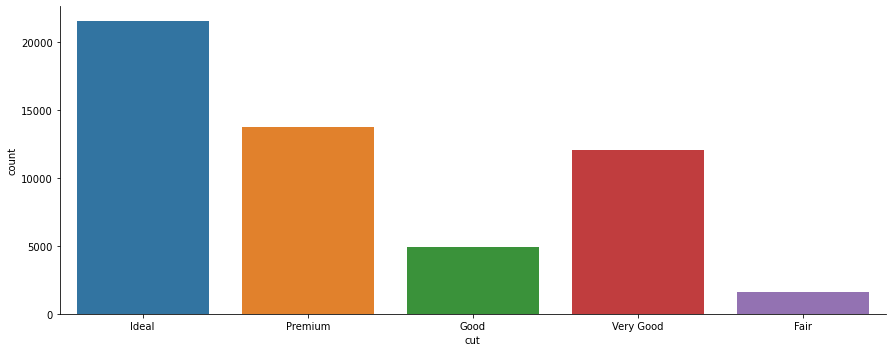

In [22]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

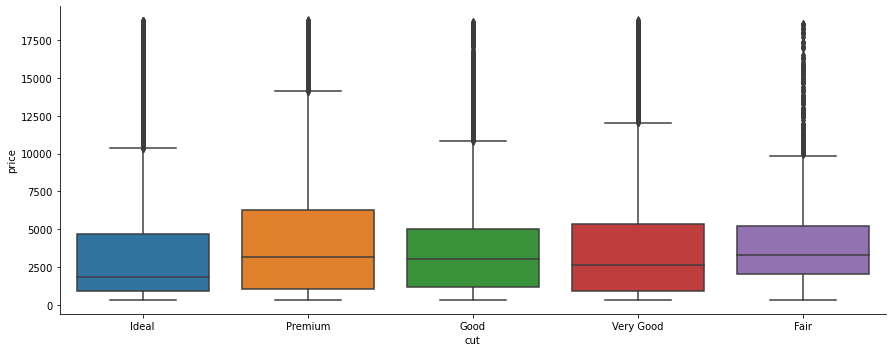

In [23]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut.

COLOR:
    The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond. The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue. Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.

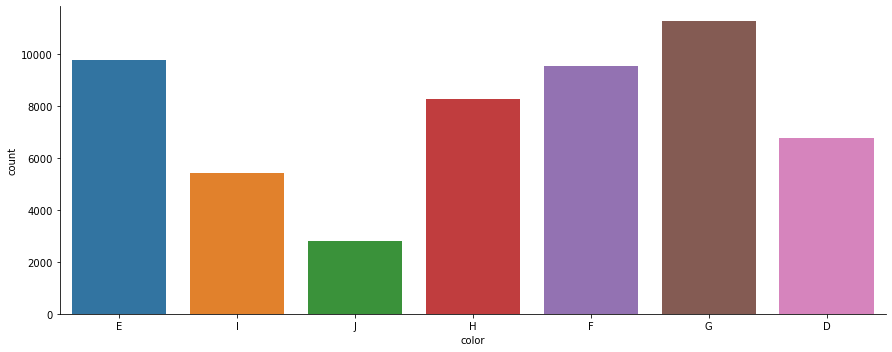

In [24]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )

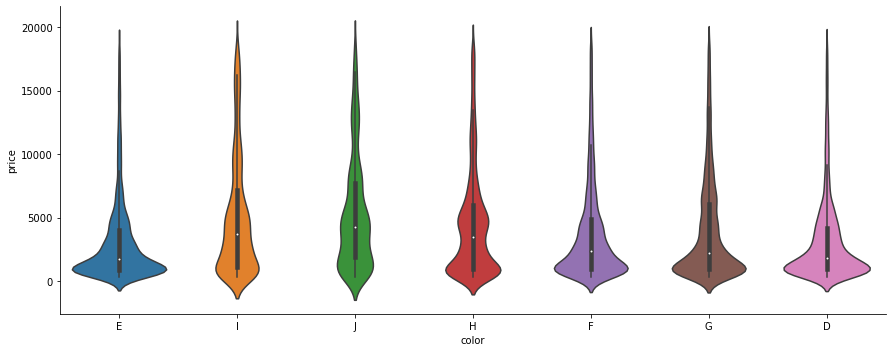

In [25]:
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2.5)

Clarity Diamond Clarity refers to the absence of the Inclusions and Blemishes. An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond. Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc.

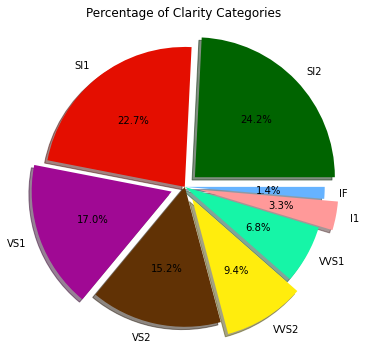

In [26]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

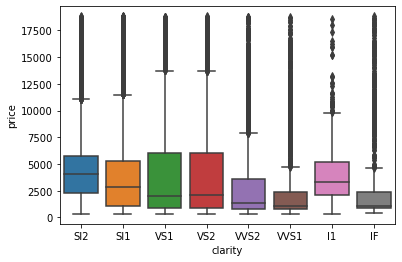

In [27]:
sns.boxplot(x='clarity', y='price', data=df )

It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.

Depth The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table. If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.

(array([1.0000e+01, 2.6935e+04, 2.4422e+04, 2.5390e+03, 1.2000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.07  ,  2.2992,  3.5284,  4.7576,  5.9868,  7.216 ,  8.4452,
         9.6744, 10.9036, 12.1328, 13.362 , 14.5912, 15.8204, 17.0496,
        18.2788, 19.508 , 20.7372, 21.9664, 23.1956, 24.4248, 25.654 ,
        26.8832, 28.1124, 29.3416, 30.5708, 31.8   ]),
 <BarContainer object of 25 artists>)

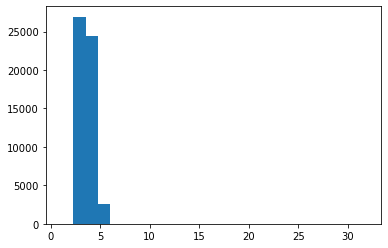

In [28]:
plt.hist('depth' , data=df , bins=25)

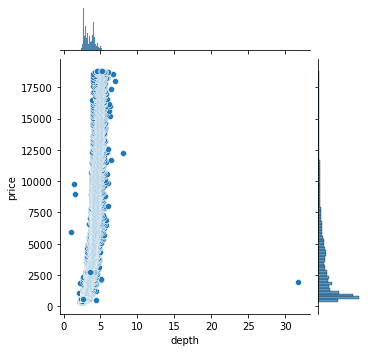

In [29]:
sns.jointplot(x='depth', y='price' , data=df , kind='scatter', size=5)

In [30]:
import sklearn

In [31]:
y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth %', 'table %', 'length', 'width', 'depth']]

In [32]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [33]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(37744, 9) (37744,)
(16176, 9) (16176,)


In [34]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
10013,Premium,H,SI1
10319,Ideal,G,SI1
15325,Good,D,SI2
28907,Very Good,H,VVS1
11754,Very Good,F,SI1


In [35]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth %,table %,length,width,depth
10013,1.01,62.6,61.0,6.39,6.36,3.99
10319,1.03,62.4,57.0,6.52,6.47,4.05
15325,1.33,59.0,64.0,7.22,7.12,4.23
28907,0.30,62.0,59.0,4.26,4.29,2.65
11754,1.01,62.4,60.0,6.35,6.40,3.98


In [36]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth %,table %,length,width,depth
10013,0.441709,0.588748,1.582390,0.582700,0.553816,0.645630
10319,0.483750,0.450073,-0.205539,0.698503,0.651824,0.732125
15325,1.114367,-1.907411,2.923336,1.322059,1.230963,0.991611
28907,-1.050751,0.172722,0.688425,-1.314692,-1.290517,-1.286101
11754,0.441709,0.450073,1.135407,0.547068,0.589455,0.631214


In [37]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
10013
10319
15325
28907
11754


In [38]:
X_train_cat=pd.DataFrame(X_train_cat,index=X_train_cat.index)

In [39]:
X_train_cat.cut.unique()

array(['Premium', 'Ideal', 'Good', 'Very Good', 'Fair'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


X_train_cat['cut'] = label_cut.fit_transform(X_train_cat['cut'])
X_train_cat['color'] = label_color.fit_transform(X_train_cat['color'])
X_train_cat['clarity'] = label_clarity.fit_transform(X_train_cat['clarity'])

In [42]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis=1)

X_train_transformed.head()

,carat,depth %,table %,length,width,depth,cut,color,clarity
10013,0.441709,0.588748,1.582390,0.582700,0.553816,0.645630,3,4,2
10319,0.483750,0.450073,-0.205539,0.698503,0.651824,0.732125,2,3,2
15325,1.114367,-1.907411,2.923336,1.322059,1.230963,0.991611,1,0,3
28907,-1.050751,0.172722,0.688425,-1.314692,-1.290517,-1.286101,4,4,6
11754,0.441709,0.450073,1.135407,0.547068,0.589455,0.631214,4,2,2


In [43]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
6797,Good,H,SI1
30232,Ideal,E,VS2
7429,Premium,D,SI1
35524,Premium,F,VS2
38052,Very Good,F,VVS2


In [44]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth %,table %,length,width,depth
6797,1.01,64.0,58.0,6.31,6.37,4.06
30232,0.33,60.5,56.0,4.48,4.51,2.72
7429,0.91,62.8,57.0,6.17,6.12,3.86
35524,0.43,59.8,58.0,4.89,4.94,2.94
38052,0.40,60.5,57.0,4.76,4.79,2.89


In [45]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth %,table %,length,width,depth
6797,0.441709,1.559477,0.241443,0.511436,0.562726,0.746541
30232,-0.987689,-0.867345,-0.652521,-1.118717,-1.094501,-1.185190
7429,0.231504,0.727424,-0.205539,0.386725,0.339980,0.458223
35524,-0.777484,-1.352709,0.241443,-0.753492,-0.711379,-0.868040
38052,-0.840545,-0.867345,-0.205539,-0.869295,-0.845026,-0.940120


In [46]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
6797
30232
7429
35524
38052


In [47]:
X_test_cat = pd.DataFrame(X_test_cat,index = X_test_cat.index)

X_test_cat.head()

,cut,color,clarity
6797,Good,H,SI1
30232,Ideal,E,VS2
7429,Premium,D,SI1
35524,Premium,F,VS2
38052,Very Good,F,VVS2


In [48]:
X_test_cat['cut'] = label_cut.fit_transform(X_test_cat['cut'])
X_test_cat['color'] = label_color.fit_transform(X_test_cat['color'])
X_test_cat['clarity'] = label_clarity.fit_transform(X_test_cat['clarity'])

In [49]:
X_test_cat

,cut,color,clarity
6797,1,4,2
30232,2,1,5
7429,3,0,2
35524,3,2,5
38052,4,2,7
...,...,...,...
16101,4,3,2
40558,4,3,6
51560,4,5,6
7746,1,2,2


In [50]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed.head()

,carat,depth %,table %,length,width,depth,cut,color,clarity
6797,0.441709,1.559477,0.241443,0.511436,0.562726,0.746541,1,4,2
30232,-0.987689,-0.867345,-0.652521,-1.118717,-1.094501,-1.185190,2,1,5
7429,0.231504,0.727424,-0.205539,0.386725,0.339980,0.458223,3,0,2
35524,-0.777484,-1.352709,0.241443,-0.753492,-0.711379,-0.868040,3,2,5
38052,-0.840545,-0.867345,-0.205539,-0.869295,-0.845026,-0.940120,4,2,7


In [51]:
import mlflow

In [52]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("Diamond Prediction")

<Experiment: artifact_location='./mlruns/1', experiment_id='1', lifecycle_stage='active', name='Diamond Prediction', tags={}>

In [53]:
from sklearn.metrics import  r2_score

In [54]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'KNN Regression','Decision Tree Regression','Random Forest Regression']

In [55]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train_transformed, y_train)

LinearRegression()

In [56]:
y_test_pred = regressor_lr.predict(X_test_transformed)

In [57]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4166.784746
30232,723,1275.014443
7429,4228,4721.067601
35524,905,1606.300941
38052,1012,2068.636906


In [58]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  851.2537134301217
Mean Squared Error:  1841607.0253141024
Root Mean Squared Error:  1357.058224732492


In [59]:
r2 = r2_score(y_test, y_test_pred)

In [60]:
R2_Scores.append(r2)

# KNN Regression

In [61]:
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor(n_neighbors=7)
regressor_knn.fit(X_train_transformed, y_train)

KNeighborsRegressor(n_neighbors=7)

In [62]:
y_test_pred = regressor_knn.predict(X_test_transformed)

In [63]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4642.285714
30232,723,849.571429
7429,4228,4502.714286
35524,905,952.142857
38052,1012,1115.142857


In [64]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  389.9576886392539
Mean Squared Error:  544282.2065153212
Root Mean Squared Error:  737.7548417430557


In [65]:
r2 = r2_score(y_test, y_test_pred)
R2_Scores.append(r2)

# Decision Tree Regression

In [66]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [67]:
y_test_pred = regressor_dt.predict(X_test_transformed)

In [68]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4604.0
30232,723,745.0
7429,4228,4158.0
35524,905,901.0
38052,1012,982.0


In [69]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  358.2171426805143
Mean Squared Error:  539298.7702305885
Root Mean Squared Error:  734.3696414140419


In [70]:
r2 = r2_score(y_test, y_test_pred)
R2_Scores.append(r2)

# Random Forest Regression

In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [72]:
y_test_pred = regressor_rf.predict(X_test_transformed)

In [73]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
6797,4116,4578.85
30232,723,732.59
7429,4228,4374.97
35524,905,975.32
38052,1012,1016.44


In [74]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  266.63822668650795
Mean Squared Error:  286457.37864007265
Root Mean Squared Error:  535.2171322370694


In [75]:
r2 = r2_score(y_test, y_test_pred)
R2_Scores.append(r2)

# Productionisation of Machine Learning Models (Model Serialization)

In [76]:
from pickle import dump

dump(scaler, open('Models/standard_scaler.pkl', 'wb'))
dump(label_cut, open('Models/label_cut.pkl', 'wb'))
dump(label_color, open('Models/label_color.pkl', 'wb'))
dump(label_clarity, open('Models/label_clarity.pkl', 'wb'))



dump(regressor_lr, open('Models/regressor_lr.pkl', 'wb'))
dump(regressor_knn, open('Models/regressor_knn.pkl', 'wb'))
dump(regressor_dt, open('Models/regressor_dt.pkl', 'wb'))
dump(regressor_rf, open('Models/regressor_rf.pkl', 'wb'))

# Experiment 1 - Training KNN Classifier

In [77]:
with mlflow.start_run():
    mlflow.set_tag("dev","sowji")
    mlflow.set_tag("algo","KNN")
    mlflow.log_param("data-path","Data/diamonds.csv")
    k=7
    mlflow.log_param("n_neighbors",k)
    knn_classifier=KNeighborsRegressor(n_neighbors=k)
    knn_classifier.fit(X_train_transformed, y_train)
    y_test_pred=knn_classifier.predict(X_test_transformed)
    acc=r2_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy",acc)
    mlflow.sklearn.log_model(knn_classifier, artifact_path="models")
    mlflow.log_artifact("Models/label_clarity.pkl")
    mlflow.log_artifact("Models/label_color.pkl")
    mlflow.log_artifact("Models/label_cut.pkl")
    mlflow.log_artifact("Models/regressor_dt.pkl")
    mlflow.log_artifact("Models/regressor_knn.pkl")
    mlflow.log_artifact("Models/regressor_lr.pkl")
    mlflow.log_artifact("Models/regressor_rf.pkl")
    mlflow.log_artifact("Models/standard_scaler.pkl")
    

# Experiment 2 - Training Linear Regression

In [78]:
with mlflow.start_run():
    mlflow.set_tag("dev", "sowji")
    mlflow.set_tag("algo", "Logit")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "Data/diamonds.csv")
    
    #elasticNetParam=0
    lr_classifier = LinearRegression()
    
    #mlflow.log_param("regParam", regParam)
    #mlflow.log_param("elasticNetParam", elasticNetParam)
    
    lr_classifier.fit(X_train_transformed, y_train)
    y_test_pred = lr_classifier.predict(X_test_transformed)
    acc =  r2_score(y_test, y_test_pred)   
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")
    mlflow.log_artifact("Models/label_clarity.pkl")
    mlflow.log_artifact("Models/label_color.pkl")
    mlflow.log_artifact("Models/label_cut.pkl")
    mlflow.log_artifact("Models/regressor_dt.pkl")
    mlflow.log_artifact("Models/regressor_knn.pkl")
    mlflow.log_artifact("Models/regressor_lr.pkl")
    mlflow.log_artifact("Models/regressor_rf.pkl")
    mlflow.log_artifact("Models/standard_scaler.pkl")

# Experiment 3 - Decision Tree Regression

In [79]:
with mlflow.start_run():
    mlflow.set_tag("dev", "sowji")
    mlflow.set_tag("algo", "decisiontree")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "Data/diamonds.csv")
    max_depth = 7
    #mlflow.log_param("C", C)
    lr_classifier = DecisionTreeRegressor(max_depth=7)
    lr_classifier.fit(X_train_transformed, y_train)
    y_test_pred = lr_classifier.predict(X_test_transformed)
    acc =  r2_score(y_test, y_test_pred)   
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")
    mlflow.log_artifact("Models/label_clarity.pkl")
    mlflow.log_artifact("Models/label_color.pkl")
    mlflow.log_artifact("Models/label_cut.pkl")
    mlflow.log_artifact("Models/regressor_dt.pkl")
    mlflow.log_artifact("Models/regressor_knn.pkl")
    mlflow.log_artifact("Models/regressor_lr.pkl")
    mlflow.log_artifact("Models/regressor_rf.pkl")
    mlflow.log_artifact("Models/standard_scaler.pkl")

# Random Forest Regression

In [80]:
with mlflow.start_run():
    mlflow.set_tag("dev", "sowji")
    mlflow.set_tag("algo", "randomforest")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "Data/diamonds.csv")
    #max_depth = 7
    #mlflow.log_param("C", C)
    lr_classifier = RandomForestRegressor()
    lr_classifier.fit(X_train_transformed, y_train)
    y_test_pred = lr_classifier.predict(X_test_transformed)
    acc =  r2_score(y_test, y_test_pred)   
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")
    mlflow.log_artifact("Models/label_clarity.pkl")
    mlflow.log_artifact("Models/label_color.pkl")
    mlflow.log_artifact("Models/label_cut.pkl")
    mlflow.log_artifact("Models/regressor_dt.pkl")
    mlflow.log_artifact("Models/regressor_knn.pkl")
    mlflow.log_artifact("Models/regressor_lr.pkl")
    mlflow.log_artifact("Models/regressor_rf.pkl")
    mlflow.log_artifact("Models/standard_scaler.pkl")

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors':[i for i in range(1, 11)], 'p':[1, 2]}]

    reg = GridSearchCV(
        estimator=KNeighborsRegressor(), 
        param_grid=tuned_parameters, 
        scoring='neg_mean_absolute_error',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    reg.fit(X_train_transformed, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
